## Exercises on the discrete Fourier transform

Oppgave:

Consider two periodic functions $f(x)$ and $g(x)$ with period $L=2$ and their truncated Fourier series $f_N(x)$ and $g_N(x)$. 
The errors $E_N$ between each function and its trigonometric approximation can be computed using Parseval's identity,
   
\begin{align*}
    E_N = \int_{-1}^{1} f^2(x)\,\mathrm{d}x - 2 \sum_{k=-N}^N |c_k|^2\, .
\end{align*}

a) Let $f(x) = e^{-x}$ for $x \in [-1,1)$ and consider its periodic extension with period $L=2$. 
   Find the Fourier coefficients of $f(x)$, calculate the error $E_N$ for $N=2$, $4$ and $8$.

\begin{align*}
c_k &= \frac{1}{L} \int_{-L/2}^{L/2} f(x) e^{-i2\pi kx/L} dx \\
&= \frac{1}{2} \int_{-1}^1 e^{-x} e^{-i\pi k x} dx \\
&= \frac{1}{2} \int_{-1}^1 e^{-(1 + i\pi k)x} dx \\
&= \frac{(-1)^k  \sinh(1)}{1+ik\pi}
\end{align*}

\begin{align*}
\int_{-1}^{1} f^2(x) \, dx &= \int_{-1}^{1} e^{-2x} dx & \\
&= \left[-\frac{e^{-2x}}{2}\right]_{-1}^1\\ 
&= \frac{e^2-e^{-2}}{2} \\
&= \sinh(2)
\end{align*}

\begin{align*}
    E_N &= \int_{-1}^{1} f^2(x)\,\mathrm{d}x - 2 \sum_{k=-N}^N |c_k|^2 \\
    &= \sinh(2) - 2 \sum_{k=-N}^N |\frac{(-1)^k  \sinh(1)}{1+ik\pi}|^2
\end{align*}

$$
\Rightarrow E_2 =0.22, E_4=0.123, E_8=0.066
$$


b) Now, do the same for $g(x) = \mathrm{e}^{-|x|}$.

Now, we find the Fourier coefficients for $g(x)$
\begin{align*}
    c_k &= \frac{1}{2}\int_{-1}^{1}\mathrm{e}^{-|x|}\mathrm{e}^{-ik\pi x}\, \mathrm{d}x = \frac{1}{1+k^2\pi^2} \left(  1 - \mathrm{e}^{-1}  (-1)^k \right).
\end{align*}

As in a), we need to compute the integral of g(x) squared
\begin{align*}
    \int_{-1}^{1} g^2(x)\mathrm{d}x =  \int_{-1}^{1} e^{-2|x|} \mathrm{d}x = 1-e^{-2},
\end{align*}

\begin{align*}
    E_N = 1-e^{-2}   - 2\sum_{k=-N}^N \left( \frac{1}{1+k^2\pi^2} \left(  1 - \mathrm{e}^{-1}  (-1)^k \right) \right)^2.
\end{align*}

Inserting values for N gives: $E_2=1.19\cdot 10^{-3}, E_4=2\cdot 10^{-4}, E_8=2.8 \cdot 10^{-5}$

c) Why is the error so much larger when approximating $f(x)$ than in the case of $g(x)$?

$g(x)$ is smoother than $f(x)$ and the Fourier series for $g(x)$ are therefore a better approximation.

Oppgave:

a) Use DFT (by hand) to find the coefficients $c_k$ for the trigonometric polynomial which interpolates the following datapoints 

| t          | 0   | 0.25 | 0.5  | 0.75 |
|------------|-----|------|------|------|
| Datapoint  | 1+i | i    | -1-i | -i   |

\begin{align*}
\mathcal{F}_4 = 
\dfrac{1}{4}
\begin{pmatrix}
1 & 1 & 1 & 1 \\
1 & \omega_N^{-1} & \omega_N^{-2} & \omega_N^{-3} \\
1 & \omega_N^{-2} & \omega_N^{-4} & \omega_N^{-6} \\
1 & \omega_N^{-3} & \omega_N^{-6} & \omega_N^{-9} \\
\end{pmatrix}
=
\dfrac{1}{4}
\begin{pmatrix}
1 &  1 &  1 &  1 \\
1 & -i & -1 &  i \\
1 & -1 &  1 & -1 \\
1 &  i & -1 & -i \\
\end{pmatrix}
\end{align*}

$c_k = \hat{\boldsymbol{f}} = \mathcal{F}_N \boldsymbol{f} \Rightarrow c_k = \dfrac{1}{4} F_4 \boldsymbol{f} = \dfrac{1}{4}[0 , 4 + 2i, 0, 2i]$

b) Plot (using Python) the real and imaginary parts of corresponding interpolation polynomial $Q_k(t) = \frac{1}{n} \sum^{n-1}_{k=0} c_k e^{2\pi i k t} $, together with the datapoints.

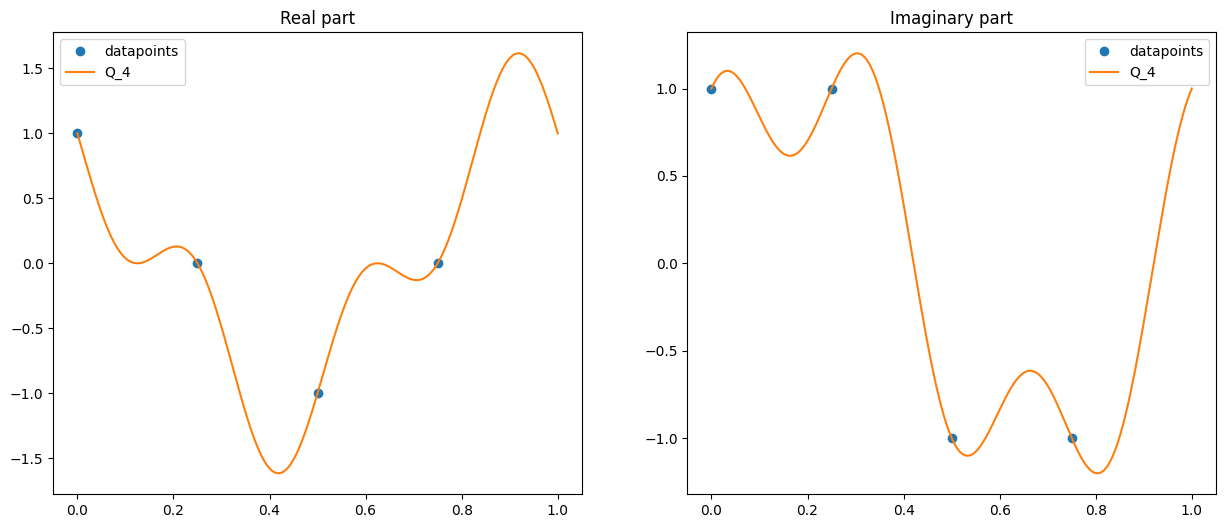

In [17]:
import numpy as np
import matplotlib.pyplot as plt

t = [0, 0.25, 0.5, 0.75]
x = np.linspace(0,1,10000)

datapoints = np.array([1+1j, 1j, -1-1j, -1j])
cks = [0, (4+2*1j)/4, 0, (2*1j)/4]

Qs = cks[0]
for i in range(1,len(cks)):
    Qs += cks[i] * np.exp(2*np.pi*1j*i*x)
# deler ikke på N siden cks allerede er delt på N

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
ax1.plot(t,datapoints.real, 'o', label="datapoints")
ax1.plot(x,Qs.real, label="Q_4")
ax1.set_title("Real part")
ax1.legend()
ax2.plot(t,datapoints.imag, 'o', label="datapoints")
ax2.plot(x,Qs.imag, label="Q_4")
ax2.set_title("Imaginary part")
ax2.legend()
plt.show()

Oppgave:

In this task we use the datapoints given in the codeblock below 

a) Interpolate using DFT, this time using numpy/scipy to find the coefficients. Plot the corresponding trigonometric interpolation polynomial $Q_{10}$, and check that it interpolates the datapoints.  

In [27]:
datapoints=np.array([ 1.0, 1.40680225, 1.30007351, 0.73203952, -0.06123174, -0.75, -1.03680225, -0.77007351, -0.00203952, 1.03123174])
t = np.array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])


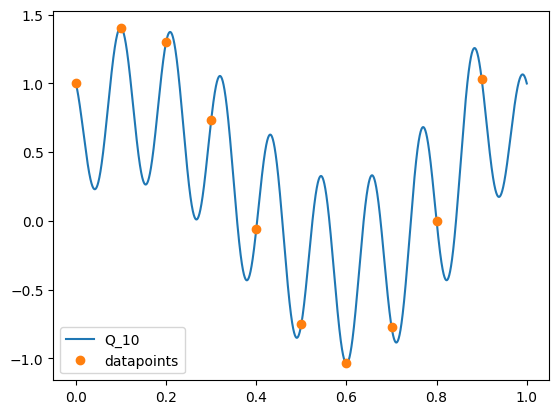

In [28]:
import scipy

N = len(datapoints)
x = np.linspace(0,1,10000)  
dft = np.fft.fft(datapoints)
# dft = scipy.fft.fft(datapoints) # ekvivalente

Q_N = dft[0]*1/N
for i in range(1,N):
    Q_N += 1/(N)*dft[i]*np.exp(2j*np.pi*x*i)

plt.plot(x, Q_N.real, label="Q_10")
plt.plot(t, datapoints, marker='o', linestyle='', label = "datapoints")
plt.legend()
plt.show()


b) Using the Euler formula, and fact that all datapoints are real-valued, we have the following formula to rewrite $Q_{10}$,
\begin{align*}
 P_n(t) = \frac{1}{n} \sum^{n-1}_{k=0} a_k \cos(2\pi k t) - b_k \sin(2\pi k t), 
\end{align*}
where $ c_k = a_k + i b_k$.  Plot $P_{10}$ and check that it is the same as $Q_{10}$.

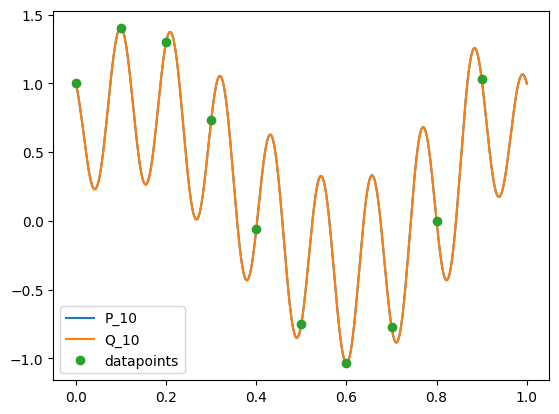

In [31]:
P_N = dft[0].real*1/N
for i in range(1,N):
    P_N += 1/(N)* (dft[i].real*np.cos(2*np.pi*i*x) - dft[i].imag*np.sin(2*np.pi*i*x))

plt.plot(x, P_N.real, label="P_10")
plt.plot(x, Q_N.real, label="Q_10")
plt.plot(t, datapoints, marker='o', linestyle='', label = "datapoints")
plt.legend()
plt.show()


c) Try plotting 


\begin{align*}
\tilde{P}_{10} = \frac{a_0}{n} + \frac{2}{n} \sum^{n/2-1}_{k=0} (a_k \cos(2\pi k t) - b_k \sin(2\pi k t)) + \frac{a_{n/2}}{n}\cos(n \pi t) 
\end{align*}

Explain why $\tilde{P}_{10}$ also interpolates the same datapoints, with only half of the Fourier terms

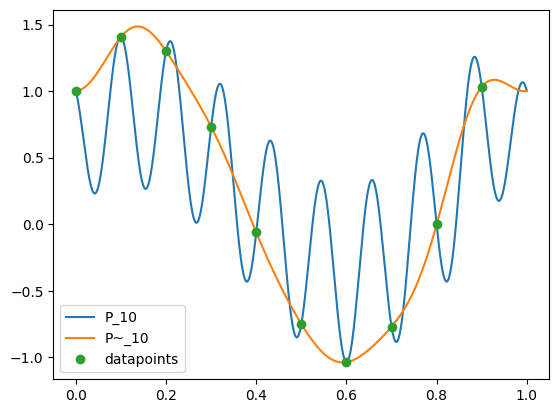

In [37]:
P_tilde_N = dft[0].real / N
for i in range(1,int(N/2)):
    P_tilde_N += 2/(N)* (dft[i].real*np.cos(2*np.pi*i*x) - dft[i].imag*np.sin(2*np.pi*i*x))
P_tilde_N += dft[int(N/2)].real / N * np.cos(N * np.pi *x)

plt.plot(x, P_N.real, label="P_10")
plt.plot(x, P_tilde_N.real, label="P~_10")
plt.plot(t, datapoints, marker='o', linestyle='', label = "datapoints")
plt.legend()
plt.show()


If we have real-valued datapoints $x_k$, and do a DFT to get $c_k$, we have that $c_0$ is real valued, and $c_{n-k} = \bar{c}_k$ (you can print out the dft above and check). Using also the trigonometric identities $\cos(2(n-k)\pi t) = \cos(2k\pi t), \sin(2(n-k)\pi t) = -\sin(2k\pi t) $, we will get the formula above (for an even number datapoints, a similar exists of odd number of datapoints). 